# Decision Trees

In [32]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(17)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Visualizing a Decision Tree

In [33]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

print("X shape: {}, y shape: {}".format(X.shape, y.shape))

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=17)
tree_clf.fit(X, y)

X shape: (150, 2), y shape: (150,)


DecisionTreeClassifier(max_depth=2, random_state=17)

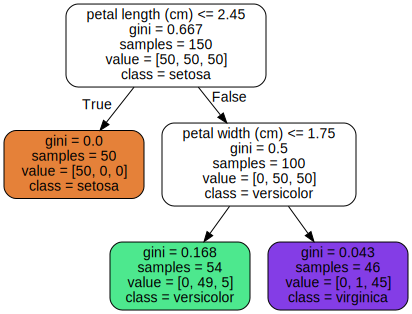

In [34]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
	tree_clf,
	out_file=os.path.join("./", "iris_tree.dot"),
	feature_names=iris.feature_names[2:],
	class_names=iris.target_names,
	rounded=True,
	filled=True,
)

Source.from_file(os.path.join("./", "iris_tree.dot"))

## Making Decision

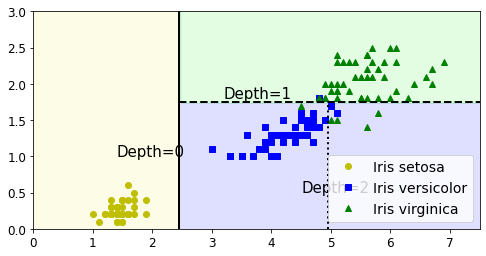

In [35]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(
    clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True
):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(["#7d7d58", "#4c4c7f", "#507d50"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "g^", label="Iris virginica")

    if legend:
        plt.legend(fontsize=14)


plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.text(1.40, 1, "Depth=0", fontsize=15)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(3.2, 1.80, "Depth=1", fontsize=15)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.text(4.5, 0.5, "Depth=2", fontsize=15)

plt.show()


## Estimate Class Probabilities

In [36]:
ret = tree_clf.predict_proba([[5, 1.5]])
print(ret)

[[0.         0.90740741 0.09259259]]


## Regularization Hyperparameters

In [37]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=17)
tree_clf_tweaked.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=17)

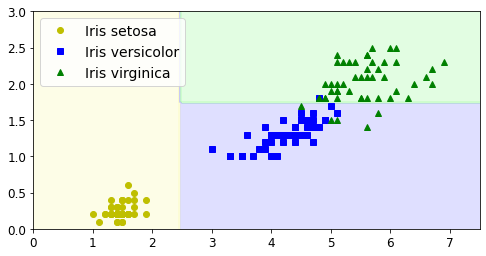

In [38]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=True)
plt.show()


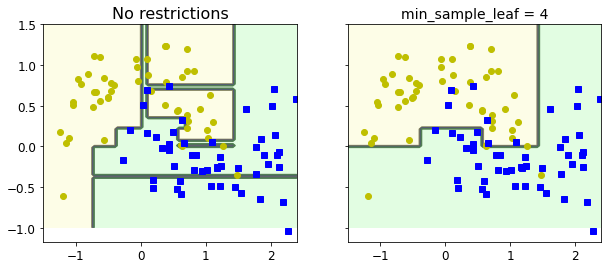

In [45]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=17)

deep_tree_clf1 = DecisionTreeClassifier(random_state=17)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=17)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)

plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.ylabel("")
plt.title("min_sample_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()


## Regression

In [49]:
np.random.seed(17)
m = 200
X = np.random.rand(m, 1)
assert X.shape == (m ,1)

y = 4 * (X-0.5) ** 2
assert y.shape == (m ,1)
y = y + np.random.randn(m, 1) / 10
assert y.shape == (m ,1)

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=17)
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=2, random_state=17)

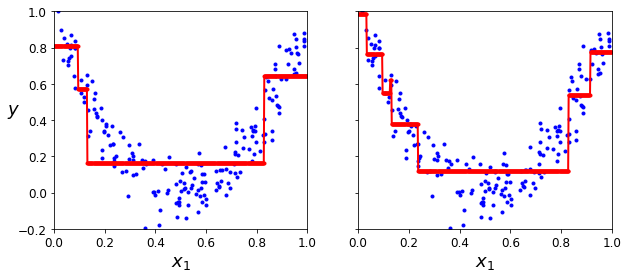

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=17, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=17, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)


def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
	x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
	y_pred = tree_reg.predict(x1)
	plt.axis(axes)
	plt.xlabel(r"$x_{1}$", fontsize=18)
	if ylabel:
		plt.ylabel(ylabel, fontsize=18, rotation=0)
	plt.plot(X, y, "b.")
	plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)

plt.show()


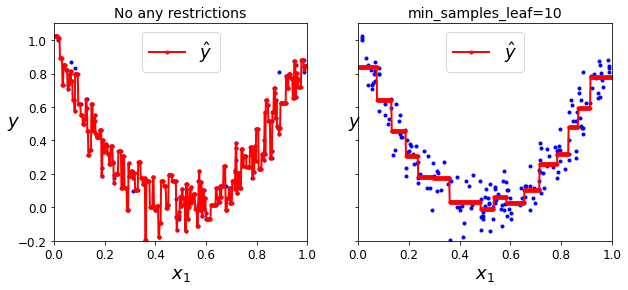

In [63]:
tree_reg1 = DecisionTreeRegressor(random_state=17)
tree_reg2 = DecisionTreeRegressor(
    random_state=17, min_samples_leaf=10
)  # regulated version

tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel(r"$x_{1}$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.title("No any restrictions", fontsize=14)
plt.legend(fontsize=18)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel(r"$x_{1}$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)
plt.legend(fontsize=18)

plt.show()
